<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/LOAN_STATUS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DEPENDENCIES


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA COLLECTION AND DATA PRE-PROCESSING

In [2]:
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
#printing first 5 rows of the dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values in each ncolumn
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [10]:
#number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
#label encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

<ipython-input-9-c6ffe5f3b4c0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [11]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
#Dependent Column Values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [13]:
#replacing 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [14]:
#dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


DATA VISUALIZATION

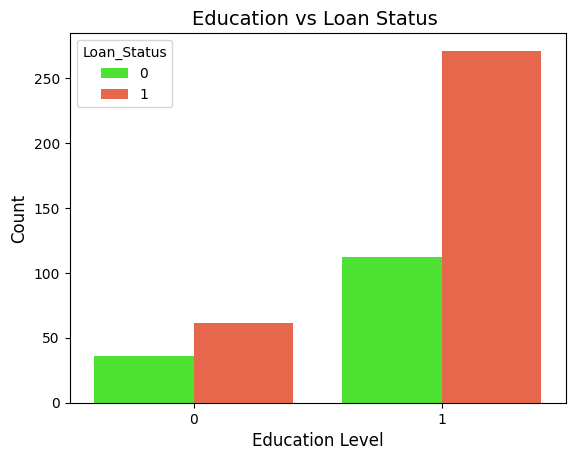

In [37]:
# Define an advanced custom palette with one radium-like color (bright ne green) and another contrasting color
custom_palette = ['#39FF14', '#FF5733']  # Neon green and bright orange-red
# Create the count plot with the custom palette
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset, palette=custom_palette)
# Add a title and customize plot appearance for a more advanced look
plt.title("Education vs Loan Status ", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Show the plot
plt.show()

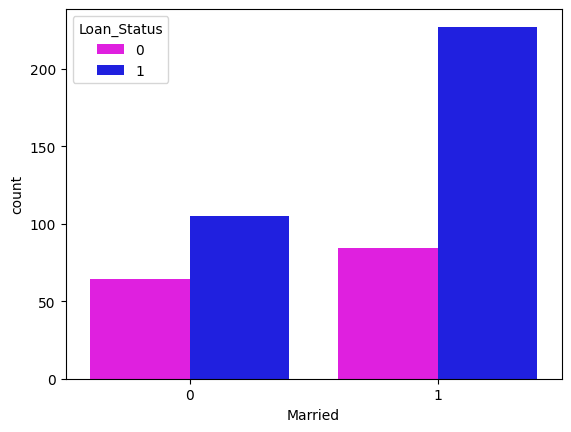

In [34]:
# marital status
# Set a custom palette (e.g., magenta and blue)
custom_palette = ['magenta', 'blue']
# Create the count plot
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset, palette=custom_palette)
# Show the plot
plt.show()


In [17]:
#convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1 },'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0, 'Yes':1},
                      'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-17-f0884b58768b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1 },'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0, 'Yes':1},


In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
#seperating the data and label
x =loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [20]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


SPLITTING THE TRAINING AND TESTING DATA

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2,stratify=y)

In [23]:
print(x.shape)

(480, 11)


In [24]:
print(y.shape)

(480,)


In [25]:
print(x_train.shape)

(432, 11)


In [26]:
print(x_test.shape)

(48, 11)


training the model using SVM

In [27]:
#training the model using SVM
classifier = svm.SVC(kernel='linear')

In [28]:
#training the support model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [29]:
#accuracy on training data
x_train_pred = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred,y_train)

In [30]:
print('ACCURACY ON TRAINING DATA:',training_data_accuracy)

ACCURACY ON TRAINING DATA: 0.7986111111111112


In [31]:
#accuracy on testing data
x_test_pred = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred,y_test)

In [32]:
print('ACCURACY ON TESTING DATA:',testing_data_accuracy)

ACCURACY ON TESTING DATA: 0.8333333333333334


 MAKING PREDICTION

In [33]:
prpperty_area = 1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1
input_data = (1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshaping = input_data_as_numpy_array.reshape(1,-1)
x = classifier.predict(input_reshaping)
print(x)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
